<a href="https://colab.research.google.com/github/emichester/03MIAR_Algoritmos_de_Optimizacion/blob/main/AG1/Algoritmos_Emilio_Jes%C3%BAs_Hernandez_Salas_AG1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Guiada 1
# Emilio Jesús Hernández Salas

- Link repositorio de GitHub: [03MIAR_Algoritmos_de_Optimizacion](https://github.com/emichester/03MIAR_Algoritmos_de_Optimizacion)

## Problema: Torres de Hanoi

In [ ]:
def torres_hanoi(N, origen, destino, pivote):
    if N ==1:
        print(f"Mover bloque {N} desde {origen} a {destino}.")
        return

    torres_hanoi(N-1, origen, pivote, destino)
    print(f"Mover bloque {N} desde {origen} a {destino}.")
    torres_hanoi(N-1, pivote, destino, origen)

torres_hanoi(4, 1, 3, 2)

Mover bloque 1 desde 1 a 2.
Mover bloque 2 desde 1 a 3.
Mover bloque 1 desde 2 a 3.
Mover bloque 3 desde 1 a 2.
Mover bloque 1 desde 3 a 1.
Mover bloque 2 desde 3 a 2.
Mover bloque 1 desde 1 a 2.
Mover bloque 4 desde 1 a 3.
Mover bloque 1 desde 2 a 3.
Mover bloque 2 desde 2 a 1.
Mover bloque 1 desde 3 a 1.
Mover bloque 3 desde 2 a 3.
Mover bloque 1 desde 1 a 2.
Mover bloque 2 desde 1 a 3.
Mover bloque 1 desde 2 a 3.


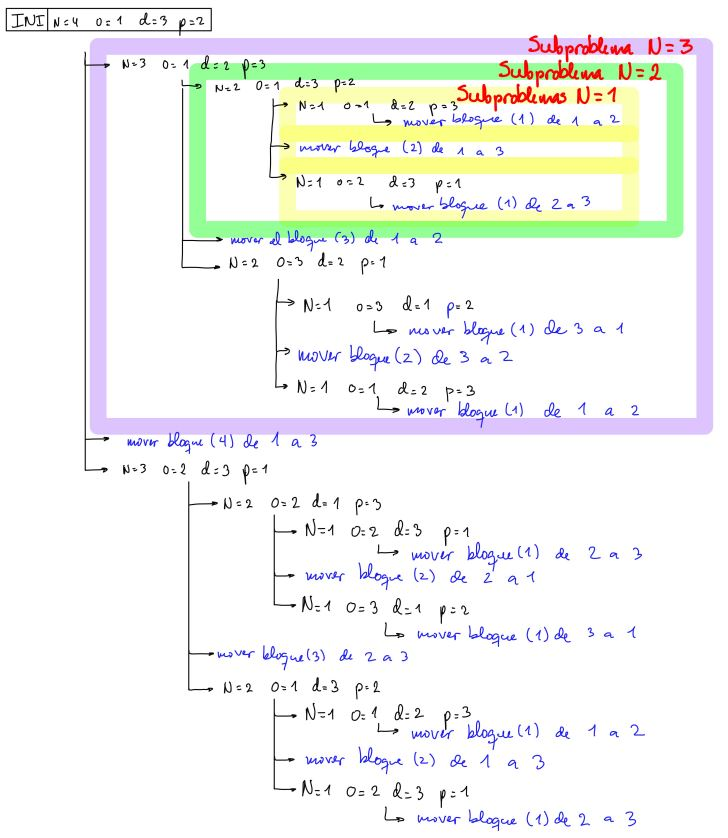

## Problema: Cambio de monedas

In [ ]:
def cambio_monedas(CANTIDAD,SISTEMA):
    print("SISTEMA: ", SISTEMA)
    SOLUCION = [0]*len(SISTEMA)
    VALOR_ACUMULADO = 0

    for i,VALOR_MONETARIO in enumerate(SISTEMA):
        monedas = (CANTIDAD-VALOR_ACUMULADO)//VALOR_MONETARIO
        SOLUCION[i] = monedas
        VALOR_ACUMULADO += monedas*VALOR_MONETARIO
        if VALOR_ACUMULADO == CANTIDAD:
            break

    return SOLUCION

SISTEMA = [25,10,5,1]
cambio_monedas(30, SISTEMA)

SISTEMA:  [25, 10, 5, 1]


[1, 0, 1, 0]

## Problema: Encontrar los dos puntos más cercanos

array([5781, 8216, 4977,  684, 8337,  606, 1439], dtype=int32)

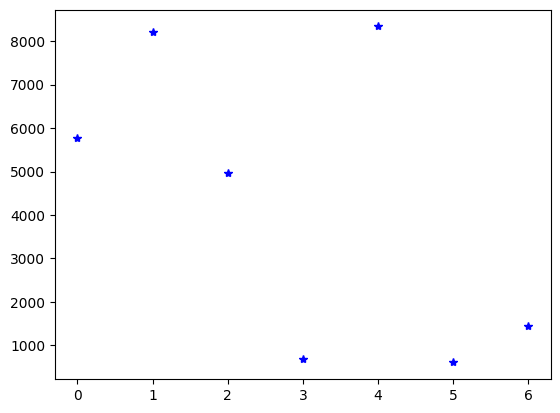

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

PUNTOS = (np.random.rand(7)*10000).astype(np.int32)
display(PUNTOS)
plt.plot(PUNTOS, 'b*');

### Fuerza bruta

In [ ]:
def puntos_cercanos_fuerza_bruta(PUNTOS):
    distancia = 1e6 # 1
    SOLUCION = [0]*2 # 1
    for i in range(0,len(PUNTOS)-1): # n-1
        for j in range(1,len(PUNTOS)): # n-1
            if np.abs(PUNTOS[i]-PUNTOS[j]) < distancia and i!=j: # 1
                distancia = np.abs(PUNTOS[i]-PUNTOS[j]) # 1
                SOLUCION = [PUNTOS[i],PUNTOS[j]] # 1
                # print(SOLUCION)
    return np.abs(SOLUCION[0]-SOLUCION[1]), SOLUCION # 1

d, pts = puntos_cercanos_fuerza_bruta(PUNTOS)
print("Puntos: ",pts, " y distancia: ", d)

Puntos:  [684, 606]  y distancia:  78


Complejidad: $1+1+(3)*((n-1)*(n-1))+1 \approx O(n^2)$

## Divide y Vencerás

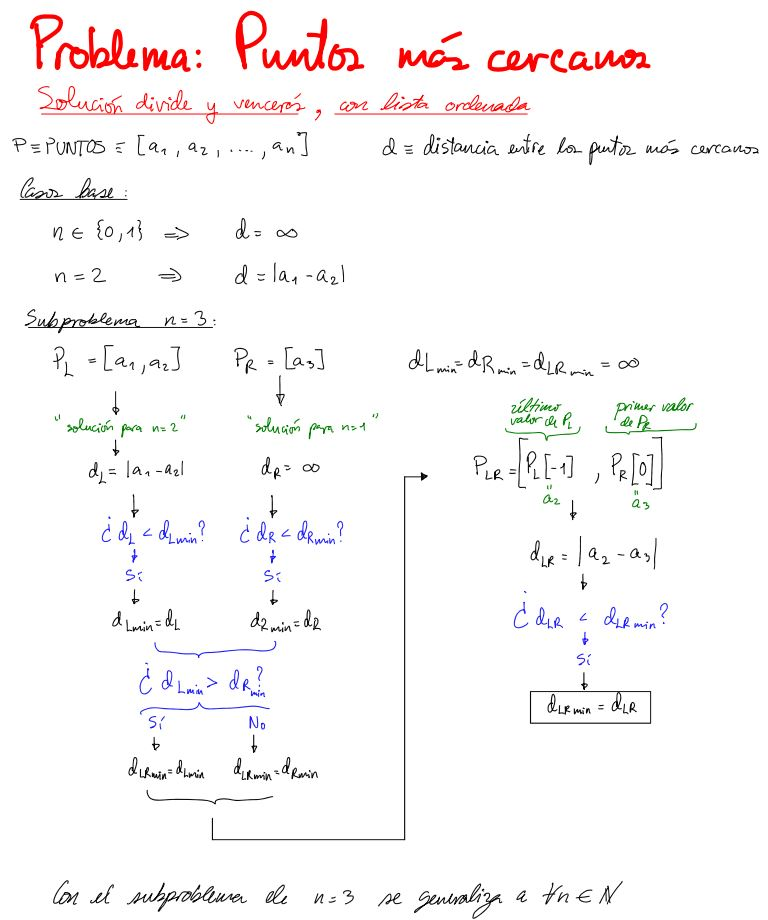

In [ ]:
def puntos_cercanos_divide_y_venceras(PUNTOS):
    dLmin = np.inf
    dRmin = np.inf
    dLRmin = np.inf
    par_minL = [0]*2
    par_minR = [0]*2
    par_minLR = [0]*2

    # La lista tiene que estar ordenada
    PUNTOS = np.sort(PUNTOS)

    if len(PUNTOS) == 1 or len(PUNTOS) == 0:
        return np.inf, PUNTOS
    if len(PUNTOS) == 2:
        return np.abs(PUNTOS[0]-PUNTOS[1]), PUNTOS

    divL, divR = np.array_split(PUNTOS, 2)
    dL, par_L = puntos_cercanos_divide_y_venceras(divL)
    dR, par_R = puntos_cercanos_divide_y_venceras(divR)

    if dL < dLmin:
        dLmin = dL
        par_minL = par_L
    if dR < dRmin:
        dRmin = dR
        par_minR = par_R
    if dRmin > dLmin:
        dLRmin = dLmin
        par_minLR = par_minL
    else:
        dLRmin = dRmin
        par_minLR = par_minR

    dLR, par_LR = puntos_cercanos_divide_y_venceras([divL[-1],divR[0]])

    if dLR < dLRmin:
        # print("Puntos: ",par_minLR, " y distancia: ", dLR)
        par_minLR = par_LR
        return dLR, par_minLR
    else:
        # print("Puntos: ",par_minLR, " y distancia: ", dLRmin)
        return dLRmin, par_minLR


d, pts = puntos_cercanos_divide_y_venceras(PUNTOS)
print("Puntos: ",pts, " y distancia: ", d)

Puntos:  [606 684]  y distancia:  78
